<a href="https://colab.research.google.com/github/AndreToledoo/PeceptronAula/blob/main/Aspirador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

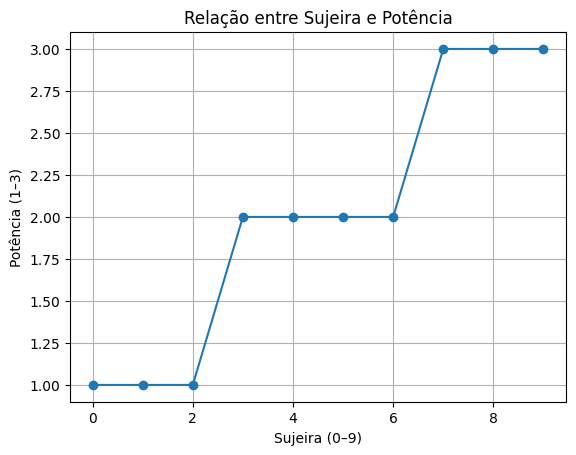

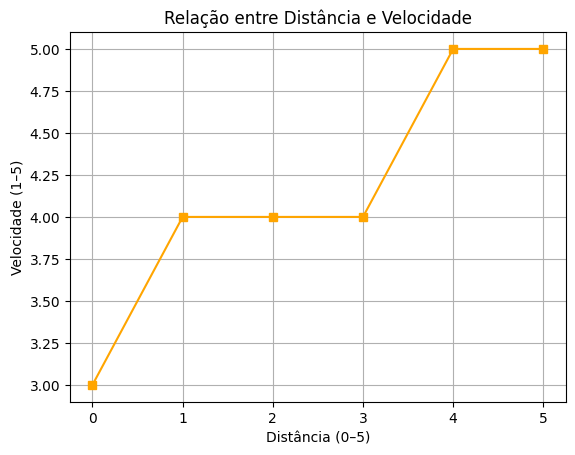

In [12]:
import matplotlib.pyplot as plt

def perceptron_aspirador(piso, sujeira, distancia):
    # Conversão do tipo de piso em valor numérico
    pisos = {"madeira": 0.5, "ceramica": 1.0, "carpete": 0.2}
    piso_valor = pisos.get(piso.lower(), 0.5)

    # Normalização da entrada
    sujeira_norm = min(max(sujeira / 9, 0), 1)      # 0–9 → 0–1
    distancia_norm = min(max(distancia / 5, 0), 1)  # 0–5 → 0–1

    # Potência depende mais da sujeira
    potencia = round(1 + 2 * sujeira_norm)
    potencia = max(1, min(3, potencia))

    # Velocidade depende de piso e distância
    vel_score = (piso_valor * 0.6) + (distancia_norm * 0.4)
    velocidade = round(1 + 4 * vel_score)
    velocidade = max(1, min(5, velocidade))

    return potencia, velocidade


# ----------------------------
# Gerar gráficos para análise
# ----------------------------

# Variação da sujeira (fixando piso e distância)
sujeiras = list(range(0, 10))
potencias = [perceptron_aspirador("carpete", s, 2)[0] for s in sujeiras]

plt.plot(sujeiras, potencias, marker="o")
plt.title("Relação entre Sujeira e Potência")
plt.xlabel("Sujeira (0–9)")
plt.ylabel("Potência (1–3)")
plt.grid(True)
plt.show()

# Variação da distância (fixando piso e sujeira)
distancias = list(range(0, 6))
velocidades = [perceptron_aspirador("ceramica", 5, d)[1] for d in distancias]

plt.plot(distancias, velocidades, marker="s", color="orange")
plt.title("Relação entre Distância e Velocidade")
plt.xlabel("Distância (0–5)")
plt.ylabel("Velocidade (1–5)")
plt.grid(True)
plt.show()